<h3>Health Failure Analysis</h3>

Imports

In [72]:
using DataFrames
using CSV
using Plots
using StatsPlots

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278


Loading data

In [56]:
ENV["COLUMNS"] = 300

300

In [58]:
df=CSV.read("heart_failure_clinical_records_dataset.csv")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
,Float64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64
1,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,55.0,0,7861,0,38,0,263358.0,1.1,136,1,0,6,1
3,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
4,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
6,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
7,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
8,60.0,1,315,1,60,0,454000.0,1.1,131,1,1,10,1
9,65.0,0,157,0,65,0,263358.0,1.5,138,0,0,10,1


First 6 rows of data

In [59]:
head(df)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
,Float64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64
1,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,55.0,0,7861,0,38,0,263358.0,1.1,136,1,0,6,1
3,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
4,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
6,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1


Columns

In [61]:
names(df)

13-element Array{String,1}:
 "age"
 "anaemia"
 "creatinine_phosphokinase"
 "diabetes"
 "ejection_fraction"
 "high_blood_pressure"
 "platelets"
 "serum_creatinine"
 "serum_sodium"
 "sex"
 "smoking"
 "time"
 "DEATH_EVENT"

Shape of dataframe (rows, columns)

In [16]:
size(df)

(299, 13)

Dataframe Statistics

In [60]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,age,60.8339,40.0,60.0,95.0,,,Float64
2,anaemia,0.431438,0,0.0,1,,,Int64
3,creatinine_phosphokinase,581.839,23,250.0,7861,,,Int64
4,diabetes,0.41806,0,0.0,1,,,Int64
5,ejection_fraction,38.0836,14,38.0,80,,,Int64
6,high_blood_pressure,0.351171,0,0.0,1,,,Int64
7,platelets,263358.0,25100.0,262000.0,850000.0,,,Float64
8,serum_creatinine,1.39388,0.5,1.1,9.4,,,Float64
9,serum_sodium,136.625,113,137.0,148,,,Int64


In [50]:
combine(groupby(df, [:sex, :DEATH_EVENT]), nrow => :count)

,sex,DEATH_EVENT,count
,Int64,Int64,Int64
1,1,1,62
2,0,1,34
3,0,0,71
4,1,0,132


In [104]:
combine(groupby(df, [:anaemia, :DEATH_EVENT]), nrow => :count)

,anaemia,DEATH_EVENT,count
,Int64,Int64,Int64
1,0,1,50
2,1,1,46
3,1,0,83
4,0,0,120


In [106]:
combine(groupby(df, [:smoking, :DEATH_EVENT]), nrow => :count)

,smoking,DEATH_EVENT,count
,Int64,Int64,Int64
1,0,1,66
2,1,1,30
3,0,0,137
4,1,0,66


In [107]:
combine(groupby(df, [:diabetes, :DEATH_EVENT]), nrow => :count)

,diabetes,DEATH_EVENT,count
,Int64,Int64,Int64
1,0,1,56
2,1,1,40
3,0,0,118
4,1,0,85


In [52]:
combine(groupby(df, [:sex, :anaemia]), nrow => :count)

,sex,anaemia,count
,Int64,Int64,Int64
1,1,0,117
2,1,1,77
3,0,1,52
4,0,0,53


In [53]:
combine(groupby(df, [:sex, :high_blood_pressure]), nrow => :count)

,sex,high_blood_pressure,count
,Int64,Int64,Int64
1,1,1,61
2,1,0,133
3,0,0,61
4,0,1,44


In [54]:
combine(groupby(df, [:sex, :smoking]), nrow => :count)

,sex,smoking,count
,Int64,Int64,Int64
1,1,0,102
2,1,1,92
3,0,0,101
4,0,1,4


In [55]:
combine(groupby(df, [:sex, :diabetes]), nrow => :count)

,sex,diabetes,count
,Int64,Int64,Int64
1,1,0,124
2,0,1,55
3,1,1,70
4,0,0,50


Selecting only the people who died

In [94]:
df_died=filter(row -> row[:DEATH_EVENT] !=0, df)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
,Float64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64
1,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,55.0,0,7861,0,38,0,263358.0,1.1,136,1,0,6,1
3,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
4,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
6,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
7,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
8,60.0,1,315,1,60,0,454000.0,1.1,131,1,1,10,1
9,65.0,0,157,0,65,0,263358.0,1.5,138,0,0,10,1


Distribution of all patients who died or didn't

Most of the patients seem to be in the dataset seem to be early-late 60s or in their 50s

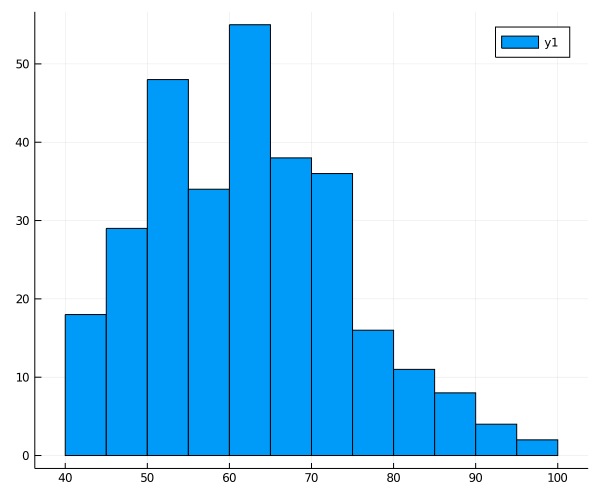

In [103]:
histogram(df.age)

Most of the patients who died were in their 60s-70s

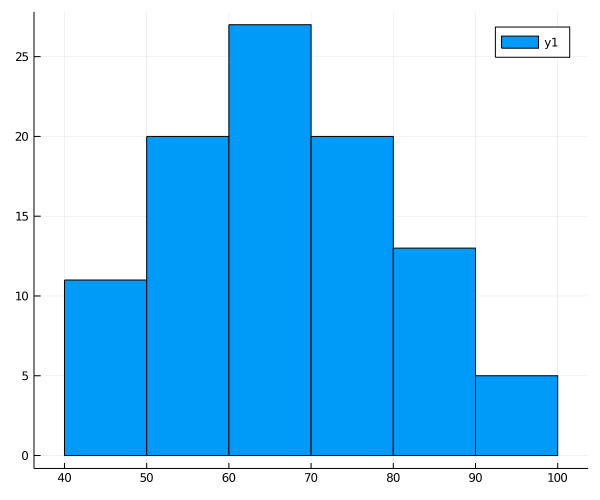

In [95]:
histogram(df_died.age)

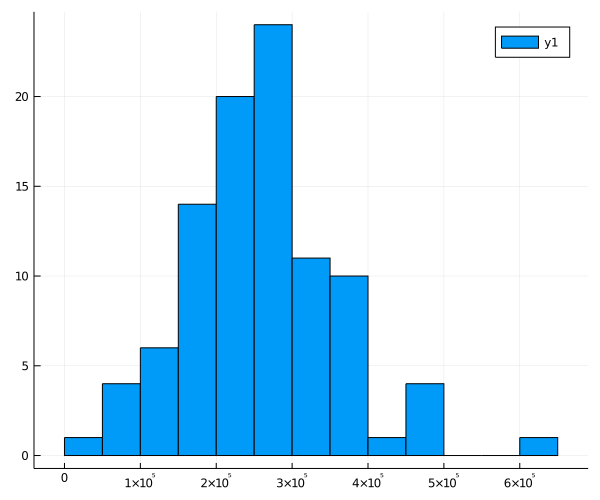

In [96]:
histogram(df_died.platelets)

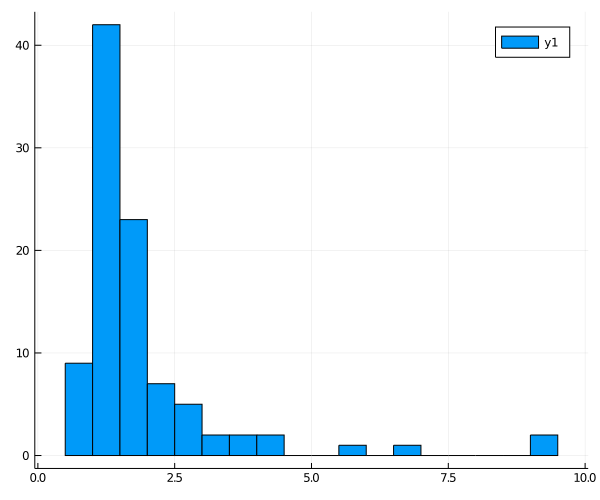

In [98]:
histogram(df_died.serum_creatinine) 

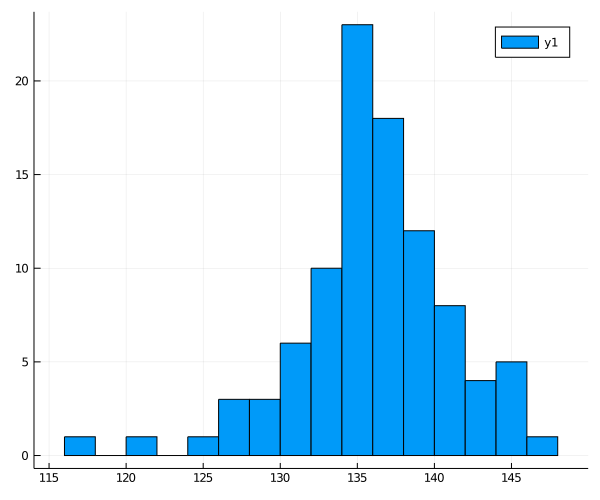

In [97]:
histogram(df_died.serum_sodium) 

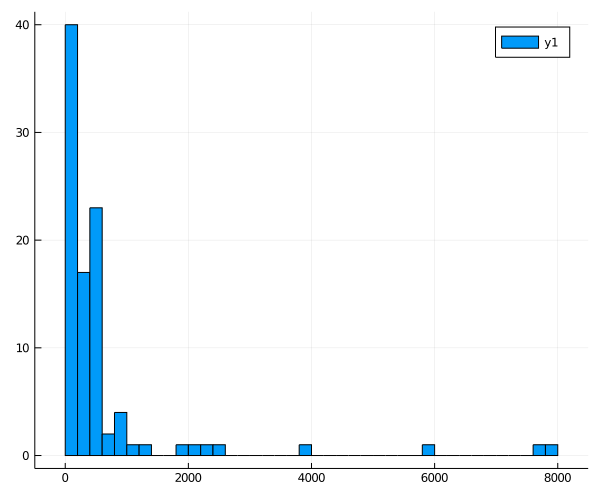

In [99]:
histogram(df_died.creatinine_phosphokinase)  